## Import necessary libraries

In [1]:
%matplotlib inline

In [2]:
import ndreg
from ndreg import preprocessor, registerer, util

In [3]:
def myshow(img, cmap='gray', colorbar=False):
    plt.imshow(sitk.GetArrayViewFromImage(img), cmap=cmap)
    if colorbar: plt.colorbar()
    plt.axis('off')
    plt.show()

### Some metadata is required before registration

In [4]:
params = {
    # voxel spacing is in mm and corresponds to (x, y, z) spacing
    'image_spacing': (0.04128, 0.04128, 0.04128),
    'image_orientation': 'rpi',
    # the modality can be 'lavision' or 'colm'
    'image_modality': 'lavision',
    'atlas_spacing': (0.05, 0.05, 0.05),
}

## Load the sample data

In [5]:
img = util.imgRead('/work/ndreg/Thy1eYFP_Control_9.tiff')
img.SetSpacing(params['image_spacing'])
atlas = util.imgRead('/work/ndreg/ARA_50um.tiff')
atlas.SetSpacing(params['atlas_spacing'])

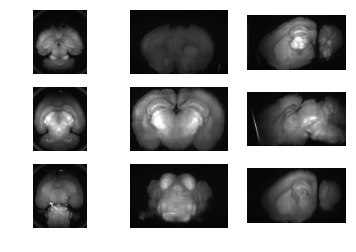

In [6]:
ndreg.imgShow(img, vmax=2000)

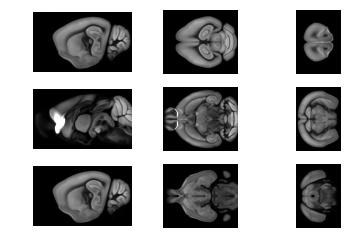

In [7]:
ndreg.imgShow(atlas, vmax=400)

## Preprocessing
This step preprocesses the input CLARITY images by resampling them to match the resolution of the atlas, bias correcting the images, and normalizing them by subtracting the mean and dividing by the standard deviation of the image intensities.

In [8]:
img_p = preprocessor.preprocess_brain(img, 
                                      params['atlas_spacing'], 
                                      params['image_modality'],
                                      params['image_orientation'])

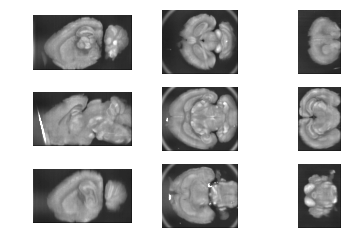

In [9]:
ndreg.imgShow(img_p, vmax=3)

## Registration
We want to obtain the parameters to transform the original image to the new image. The transformation from the original image to the new image can be described as a composition of an affine transformation which can perform a combination of translation, scaling, rotation, and shear and deformable registration called LDDMM.

The output of this method is the atlas registered to the raw data

In [ ]:
atlas_registered = ndreg.register_brain(atlas, img_p,
                                        params['image_modality'],
                                        params['image_orientation'])

## Visualize registered image

The two images below should match if the registration worked successfully!

In [ ]:
ndreg.imgShow(atlas_registered)

# Quantitative evaluation

The closer this image is to all 0s, the better the match of the two images. Since the image below is almost all black, we can qualitatively say that the registration quality is very high. In order to quantify

In [ ]:
myshow(difference_image,colorbar=True)

In [ ]:
print("Registration error is: {} voxels^2".format(registerer.imgMSE(normalize(img_lddmm), normalize(img_warped))))